<a href="https://colab.research.google.com/github/shivadb/Kaggle/blob/master/ECE225A_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Import
Public datasets on kaggle are publically accessible through google cloud. We will utilize the gcsfs library to directly access the data from GCS.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"]=10,10
plt.style.use('default')

In [ ]:
# gcsfs required to read files from google cloud storage
! pip install gcsfs

[GCS Link](https://console.cloud.google.com/storage/browser/kds-51b0522af087dbaafe40bba4aea1224f3edc633feb27a46bd5bfdf52)

In [5]:
GCS_PATH = 'gs://kds-51b0522af087dbaafe40bba4aea1224f3edc633feb27a46bd5bfdf52'
LISTINGS_PATH = GCS_PATH + '/listings.csv'

raw_listings_df = pd.read_csv(LISTINGS_PATH)
raw_listings_df

id  ... reviews_per_month
0       241032  ...              4.07
1       953595  ...              1.48
2      3308979  ...              1.15
3      7421966  ...               NaN
4       278830  ...              0.89
...        ...  ...               ...
3813   8101950  ...              0.30
3814   8902327  ...              2.00
3815  10267360  ...               NaN
3816   9604740  ...               NaN
3817  10208623  ...               NaN

[3818 rows x 92 columns]

#Data Cleanup
Any cleanup required to perform EDA and build predictive models will be outlined in this section

In [ ]:
raw_listings_df.columns.tolist()

In [ ]:
def get_quick_stats(df, feature):
  print(df[feature].describe())
  print('Number of NaN: ', df[feature].isna().sum())

In [86]:
get_quick_stats(raw_listings_df,'reviews_per_month')

count    3191.000000
mean        2.078919
std         1.822348
min         0.020000
25%         0.695000
50%         1.540000
75%         3.000000
max        12.150000
Name: reviews_per_month, dtype: float64
Number of NaN:  627


In [ ]:
raw_listings_df[raw_listings_df['minimum_nights'] == 1000]

In [61]:
raw_listings_df.has_availability.unique()

array(['t'], dtype=object)

In [88]:
#useful columns (determined subjectively through prior knowledge)
useful_columns = ['id',
                # 'listing_url',
                # 'scrape_id',
                # 'last_scraped',
                # 'name',
                # 'summary',
                # 'space',
                # 'description',
                # 'experiences_offered',
                # 'neighborhood_overview',
                # 'notes',
                # 'transit',
                # 'thumbnail_url',
                # 'medium_url',
                # 'picture_url',
                # 'xl_picture_url',
                'host_id',
                'host_url',
                'host_name',
                'host_since',
                'host_location',
                'host_about',
                'host_response_time',
                'host_response_rate',
                'host_acceptance_rate',
                'host_is_superhost',
                'host_thumbnail_url',
                'host_picture_url',
                'host_neighbourhood',
                'host_listings_count',
                'host_total_listings_count',
                'host_verifications',
                'host_has_profile_pic',
                'host_identity_verified',
                # 'street',
                'neighbourhood',
                'neighbourhood_cleansed',
                'neighbourhood_group_cleansed',
                # 'city',
                # 'state',
                # 'zipcode',
                # 'market',
                # 'smart_location',
                # 'country_code',
                # 'country',
                'latitude',
                'longitude',
                'is_location_exact',
                'property_type',
                'room_type',
                'accommodates',
                'bathrooms',
                'bedrooms',
                'beds',
                'bed_type',
                'amenities',
                # 'square_feet',
                'price',
                # 'weekly_price',
                # 'monthly_price', #too many NaN
                # 'security_deposit',  #too many NaN
                # 'cleaning_fee',  #too many NaN
                'guests_included',
                'extra_people',
                'minimum_nights', # one entry that has value 1000 (probably unrealistic)
                'maximum_nights',
                'calendar_updated',
                # 'has_availability', #always true
                'availability_30',
                'availability_60',
                'availability_90',
                'availability_365',
                # 'calendar_last_scraped', #1 uniqe value
                'number_of_reviews',
                'first_review', #627 NaN values
                'last_review', #627 NaN values
                'review_scores_rating', #627 NaN values
                'review_scores_accuracy', #658 NaN values
                'review_scores_cleanliness', #653 NaN
                'review_scores_checkin', #658 NaN
                'review_scores_communication', #651 NaN
                'review_scores_location', #655 NaN
                'review_scores_value', #656 NaN
                # 'requires_license',  #all false
                # 'license', #all NaN
                # 'jurisdiction_names', #1 unique value
                'instant_bookable',
                'cancellation_policy',
                'require_guest_profile_picture',
                'require_guest_phone_verification',
                'calculated_host_listings_count',
                'reviews_per_month'] # 627 NaN

listings_df = raw_listings_df[useful_columns].set_index('id')

In [89]:
# Add a cleaned price column that is numeric
listings_df['price_clean'] = listings_df['price'].str.replace(',', '').str.replace('$', '').astype(float)

In [90]:
# Add a column with with clean numeric ratings (replace NaN with 0)
listings_df['rating_clean'] = listings_df['review_scores_rating'].fillna(0)

In [91]:
mapping = {'f':0, 't':1, np.nan:0}
listings_df['host_is_superhost'].unique()
listings_df['is_superhost_clean'] = listings_df['host_is_superhost'].replace(mapping).astype(int)
listings_df['is_superhost_clean']

id
241032      0
953595      1
3308979     0
7421966     0
278830      0
           ..
8101950     0
8902327     0
10267360    0
9604740     0
10208623    0
Name: is_superhost_clean, Length: 3818, dtype: int64

In [92]:
listings_df['property_type'].unique()
listings_df['property_type_clean'] = listings_df['property_type'].replace({np.nan:'Other'})
listings_df['property_type_clean'].unique()

array(['Apartment', 'House', 'Cabin', 'Condominium', 'Camper/RV',
       'Bungalow', 'Townhouse', 'Loft', 'Boat', 'Bed & Breakfast',
       'Other', 'Dorm', 'Treehouse', 'Yurt', 'Chalet', 'Tent'],
      dtype=object)

In [93]:
listings_df['beds'].unique()

array([ 1.,  7.,  2.,  3., 15.,  5.,  4.,  6.,  9.,  8., nan, 10.])

#Feature Engineering

##Amenities

In [123]:
listings_df['amenities']
# listings_df.iloc[124]['amenities']

'{Internet,"Wireless Internet",Kitchen,Heating,Washer,Dryer,"Smoke Detector","Fire Extinguisher",Essentials}'

In [102]:
#try and get a sense of common amenities
raw_amenities_list = listings_df['amenities'].str.strip('{}').str.replace('"', '').str.lstrip('\"').str.rstrip('\"').str.split(',')
raw_amenities_list

id
241032      [TV, Cable TV, Internet, Wireless Internet, Ai...
953595      [TV, Internet, Wireless Internet, Kitchen, Fre...
3308979     [TV, Cable TV, Internet, Wireless Internet, Ai...
7421966     [Internet, Wireless Internet, Kitchen, Indoor ...
278830      [TV, Cable TV, Internet, Wireless Internet, Ki...
                                  ...                        
8101950     [TV, Cable TV, Internet, Wireless Internet, Ai...
8902327     [TV, Cable TV, Internet, Wireless Internet, Ki...
10267360    [Cable TV, Wireless Internet, Kitchen, Free Pa...
9604740     [TV, Wireless Internet, Kitchen, Free Parking ...
10208623    [TV, Cable TV, Internet, Wireless Internet, Ki...
Name: amenities, Length: 3818, dtype: object

the data structure consists of a category and the specific type of amenity within the category

eg: TV: Cable TV, Internet: Wireless Internet, etc...

Lets start by simply aggregating counts of elements we find in this column (both categories and items)


In [125]:
from collections import Counter
counts = Counter()
raw_amenities_list.apply(counts.update)
print('Total unique values: ', len(counts))
counts

Total unique values:  42


Counter({'': 45,
         '24-Hour Check-in': 616,
         'Air Conditioning': 677,
         'Breakfast': 291,
         'Buzzer/Wireless Intercom': 538,
         'Cable TV': 1446,
         'Carbon Monoxide Detector': 2485,
         'Cat(s)': 382,
         'Dog(s)': 509,
         'Doorman': 85,
         'Dryer': 2997,
         'Elevator in Building': 785,
         'Essentials': 3237,
         'Family/Kid Friendly': 1963,
         'Fire Extinguisher': 2196,
         'First Aid Kit': 1680,
         'Free Parking on Premises': 2167,
         'Gym': 442,
         'Hair Dryer': 774,
         'Hangers': 846,
         'Heating': 3627,
         'Hot Tub': 303,
         'Indoor Fireplace': 886,
         'Internet': 2811,
         'Iron': 742,
         'Kitchen': 3423,
         'Laptop Friendly Workspace': 745,
         'Lock on Bedroom Door': 100,
         'Other pet(s)': 51,
         'Pets Allowed': 472,
         'Pets live on this property': 883,
         'Pool': 159,
         'Safety Card': 

There are 42 values in total, which is easy enough to look through manually to determine which of those may ne useful.

Any items determined to be usedful can then be added to the dataframe as a boolean column

Let's pick:
- Air Conditioning
- Breakfast
- Cable TV
- Pool

In [135]:
listings_df['has_AC'] = listings_df['amenities'].str.contains('Air Conditioning')
listings_df['has_breakfast'] = listings_df['amenities'].str.contains('Breakfast')
listings_df['has_cable'] = listings_df['amenities'].str.contains('Cable TV')
listings_df['has_pool'] = listings_df['amenities'].str.contains('Pool')

#EDA

##Listings

In [ ]:
plt.rcParams["figure.figsize"]=7,7
plt.style.use('dark_background')

property_type_df = listings_df.groupby('property_type_clean').size().sort_values(ascending=False)
labels = property_type_df.index.values.tolist()
percs = property_type_df.values.tolist()/sum(property_type_df.values) * 100
explode = [0.015 for i in range(len(listings_df['property_type_clean'].unique()))]
ax = property_type_df.plot.pie(y='counts', rotatelabels=True, labeldistance=None, explode=explode, startangle=90)
ax.legend(bbox_to_anchor=(1, 1), labels=['%s - %1.2f %%' % (l, s) for l, s in zip(labels, percs)])
ax.set_ylabel('')


In [94]:
def display_feature_pie_chart(df, feature, title):
  plt.rcParams["figure.figsize"]=5,5
  plt.style.use('dark_background')

  feature_df = df.groupby(feature).size().sort_values(ascending=False)
  labels = feature_df.index.values.tolist()
  percs = feature_df.values.tolist()/sum(feature_df.values) * 100
  # explode = [0.015 for i in range(len(df[feature].unique()))]
  # ax = feature_df.plot.pie(y='counts', rotatelabels=True, labeldistance=None, explode=explode, startangle=90)
  ax = feature_df.plot.pie(y='counts', rotatelabels=True, labeldistance=None, startangle=90)
  ax.legend(bbox_to_anchor=(1, 1), labels=['%s - %1.2f %%' % (l, s) for l, s in zip(labels, percs)])
  ax.set_ylabel('')
  plt.title(title)
  plt.show()

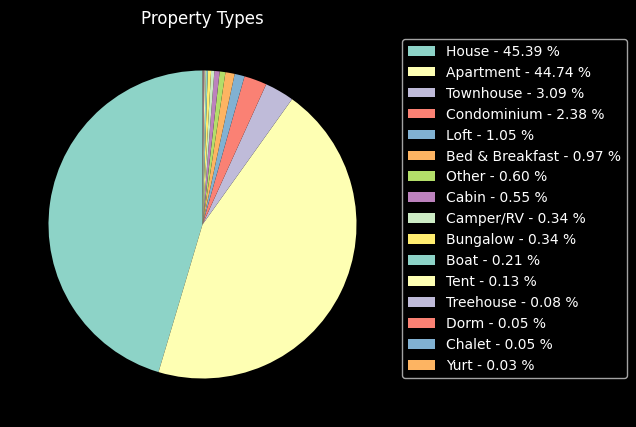

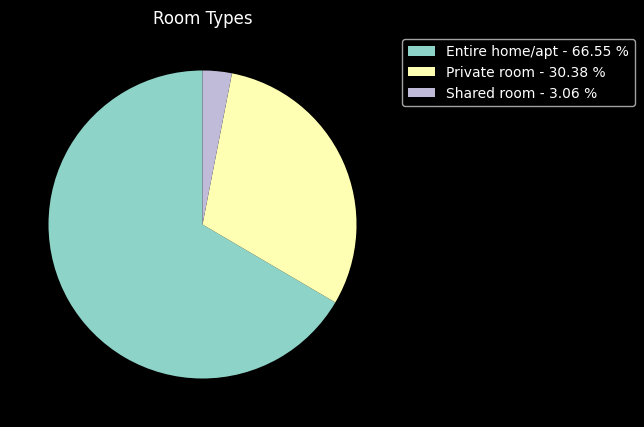

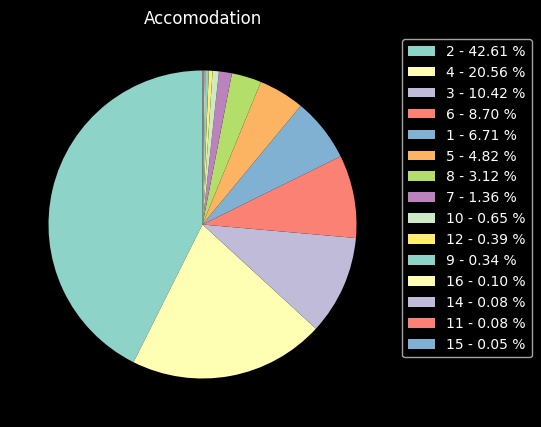

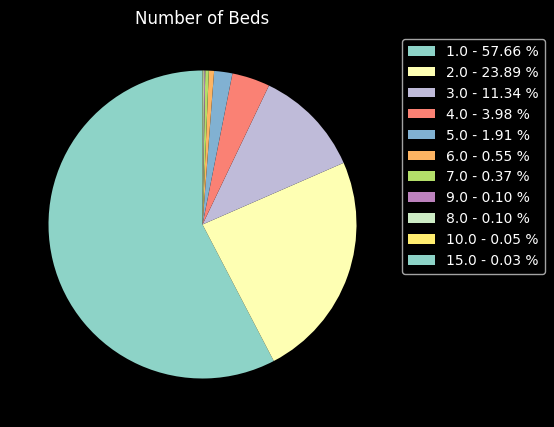

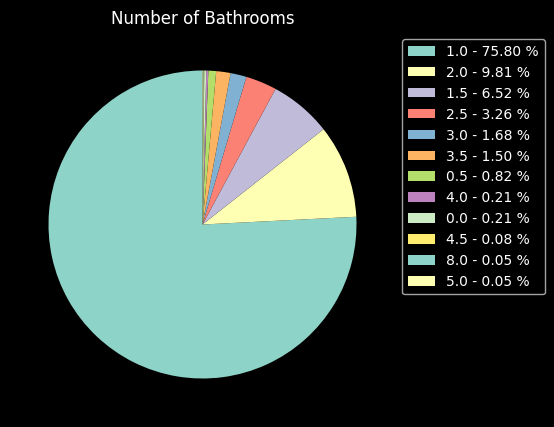

In [95]:
display_feature_pie_chart(listings_df, 'property_type_clean', 'Property Types')
display_feature_pie_chart(listings_df, 'room_type', 'Room Types')
display_feature_pie_chart(listings_df, 'accommodates', 'Accomodation')
display_feature_pie_chart(listings_df, 'beds', 'Number of Beds')
display_feature_pie_chart(listings_df, 'bathrooms', 'Number of Bathrooms')

##Location


###Visualization
[Stock Image of Seattle](https://cdn4.vectorstock.com/i/1000x1000/54/63/city-map-seattle-color-detailed-plan-vector-22495463.jpg)

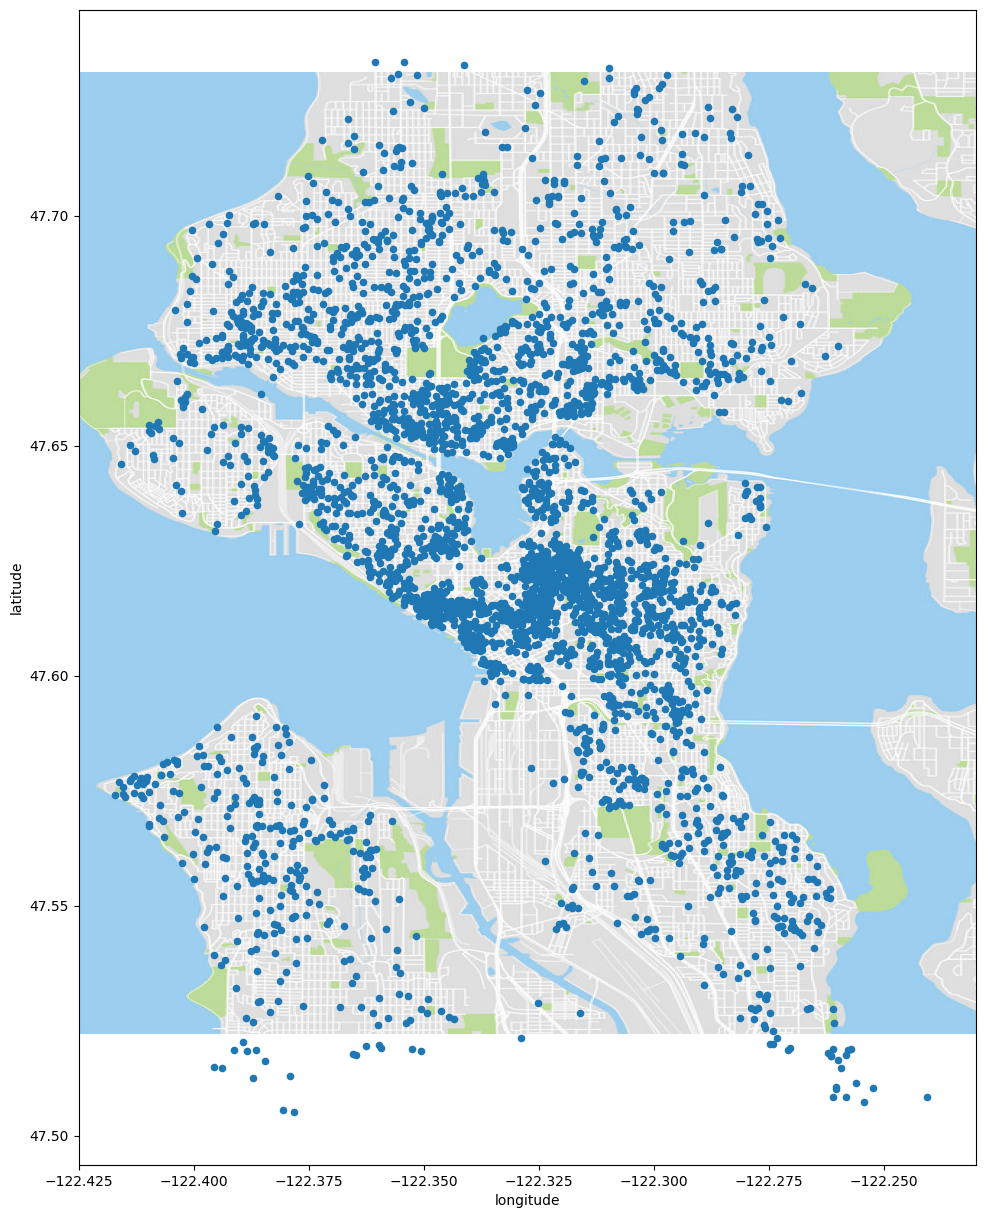

In [ ]:
import urllib
#read in stock image
stock_img_url = 'https://cdn4.vectorstock.com/i/1000x1000/54/63/city-map-seattle-color-detailed-plan-vector-22495463.jpg'
seattle_map = urllib.request.urlopen(stock_img_url)
map_plt = plt.imread(seattle_map,'jpg')
map_plt_shape = (map_plt.shape) #(1080, 714, 3)
map_plt = map_plt[0:1000, 50:670, :]
plt.rcParams["figure.figsize"]=15,15

plt.imshow(map_plt, extent=[-122.425, -122.23, 47.522,47.731])
ax = plt.gca()
location_plt=listings_df.plot(kind='scatter', x='longitude', y='latitude' ,ax=ax)


In [ ]:
# def plot_feature_by_location(ds, feature):
#   stock_img_url = 'https://cdn4.vectorstock.com/i/1000x1000/54/63/city-map-seattle-color-detailed-plan-vector-22495463.jpg'
#   seattle_map = urllib.request.urlopen(stock_img_url)
#   map_plt = plt.imread(seattle_map,'jpg')
#   map_plt_shape = (map_plt.shape) #(1080, 714, 3)
#   map_plt = map_plt[0:1025, 60:660, :]
#   plt.rcParams["figure.figsize"]=10,10

#   plt.imshow(map_plt, extent=[-122.425, -122.23, 47.50,47.744])
#   ax = plt.gca()
#   location_plt=ds.plot(kind='scatter', x='longitude', y='latitude', c=feature ,ax=ax,
#                                 cmap=plt.get_cmap('Reds'), colorbar=True, alpha=0.6, zorder=5)

In [ ]:
def plot_feature_by_location(ds, feature, cmap='Reds'):
  plt.style.use('default')
  stock_img_url = 'https://cdn4.vectorstock.com/i/1000x1000/54/63/city-map-seattle-color-detailed-plan-vector-22495463.jpg'
  seattle_map = urllib.request.urlopen(stock_img_url)
  map_plt = plt.imread(seattle_map,'jpg')
  map_plt_shape = (map_plt.shape) #(1080, 714, 3)
  map_plt = map_plt[0:1000, 50:670, :]
  plt.rcParams["figure.figsize"]=15,15

  plt.imshow(map_plt, extent=[-122.425, -122.23, 47.522,47.731])
  ax = plt.gca()
  location_plt=ds.plot(kind='scatter', x='longitude', y='latitude', c=feature ,ax=ax,
                                cmap=plt.get_cmap(cmap), colorbar=True, alpha=0.6)
  plt.show()

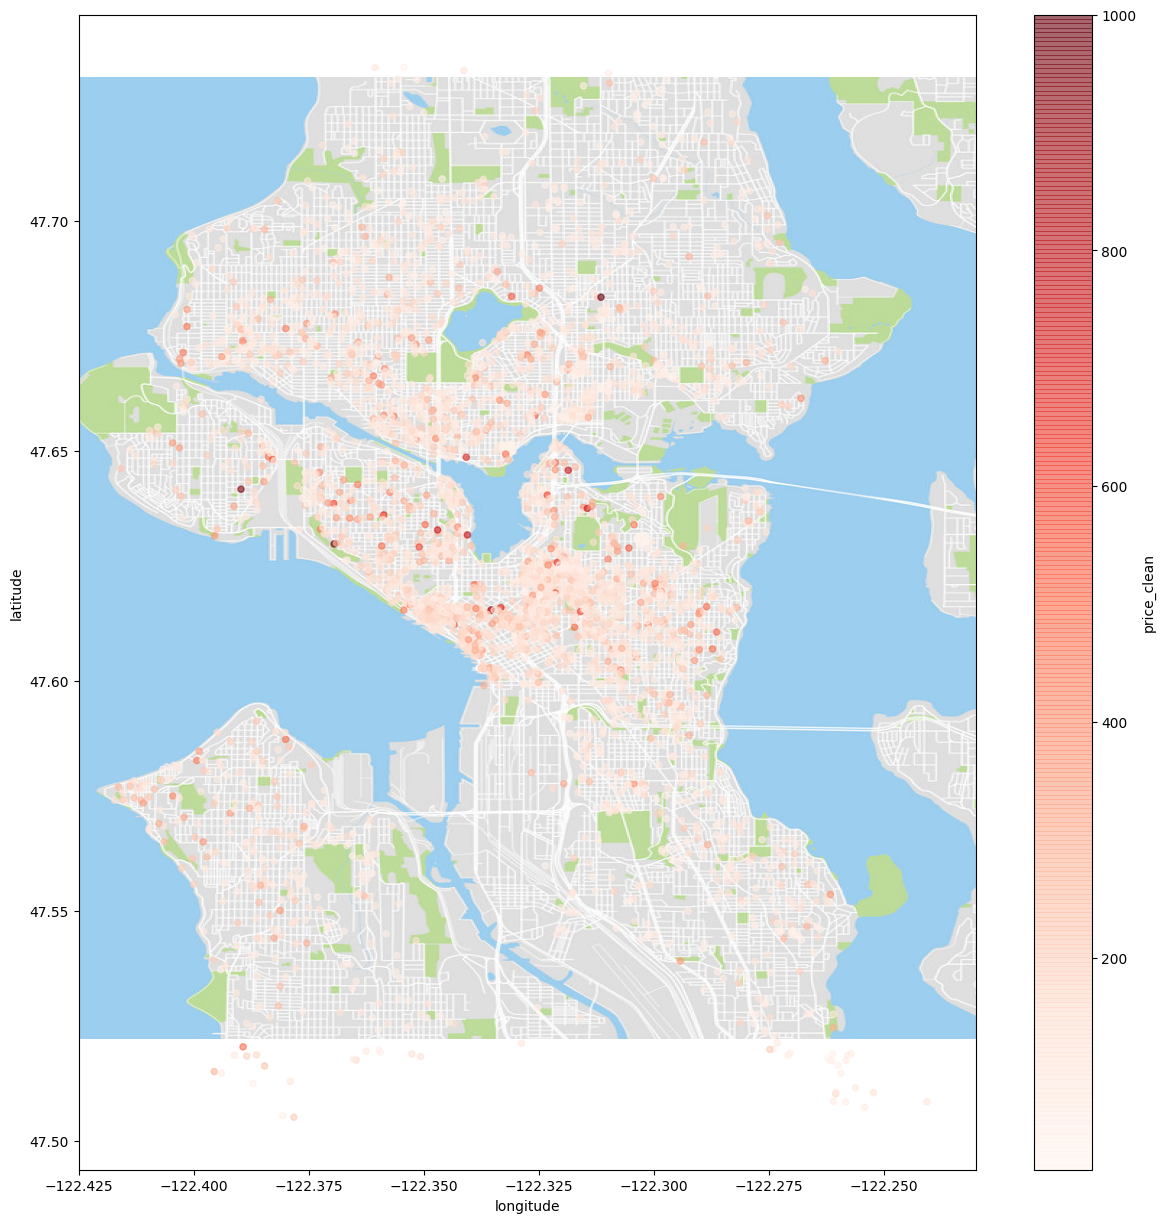

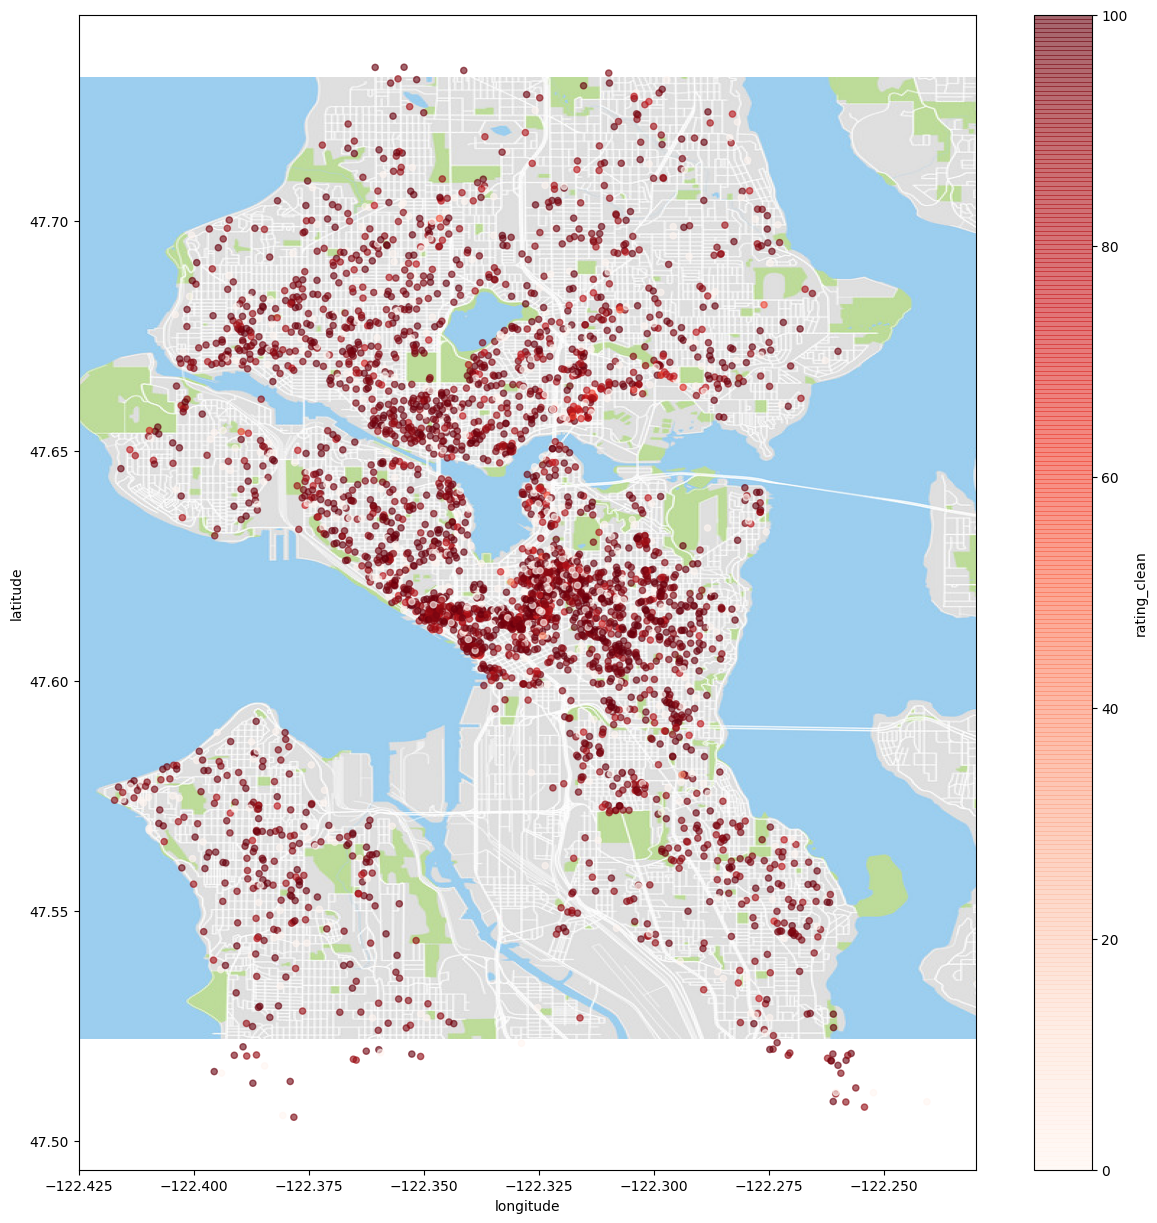

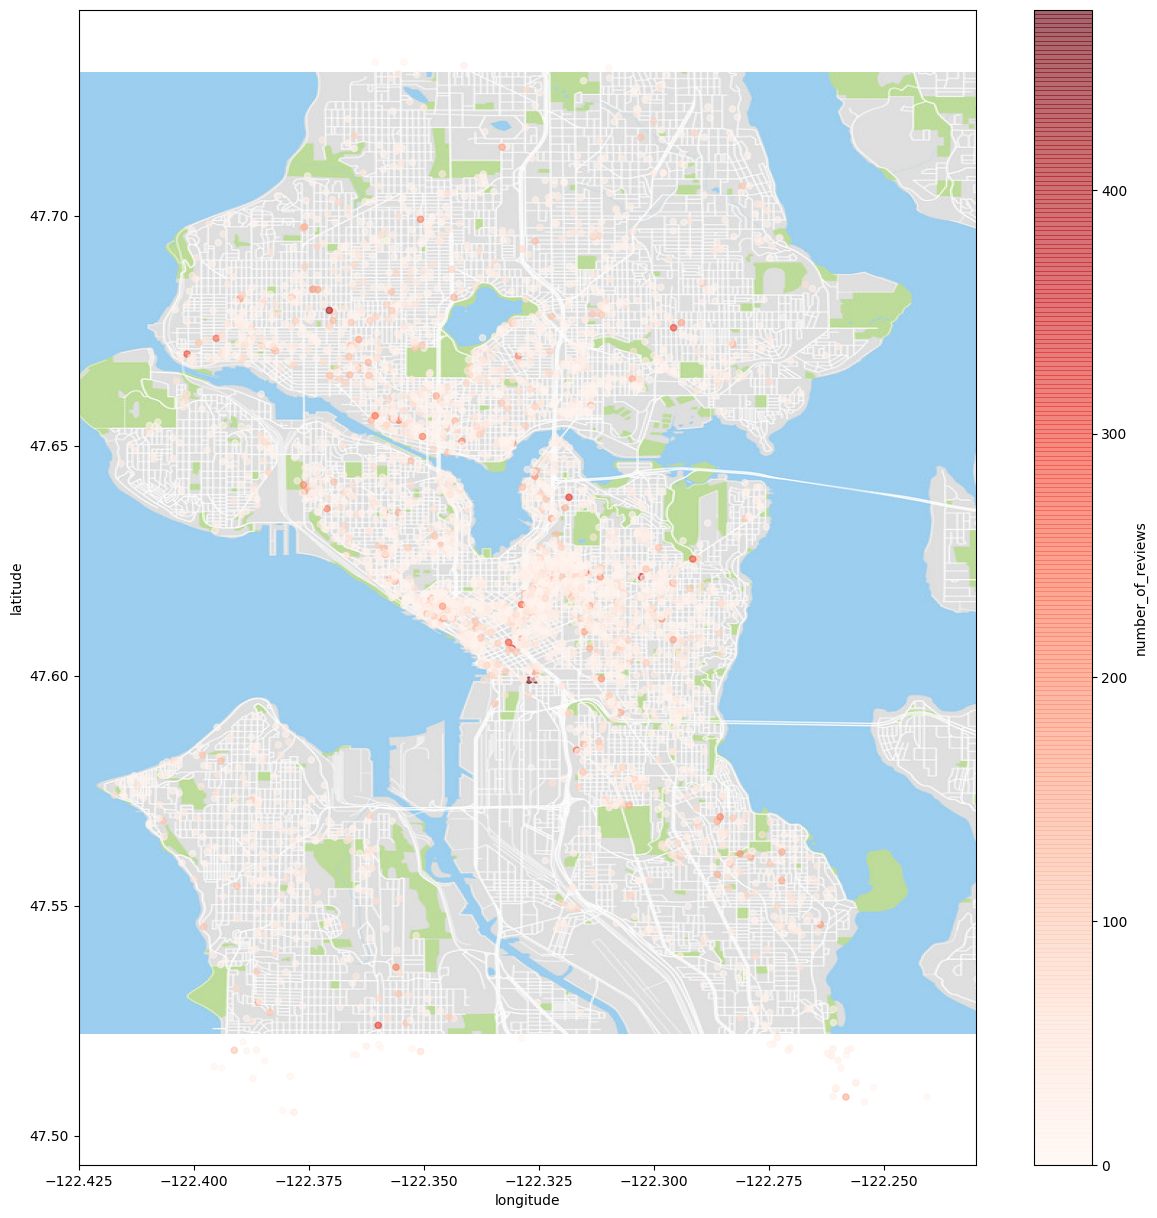

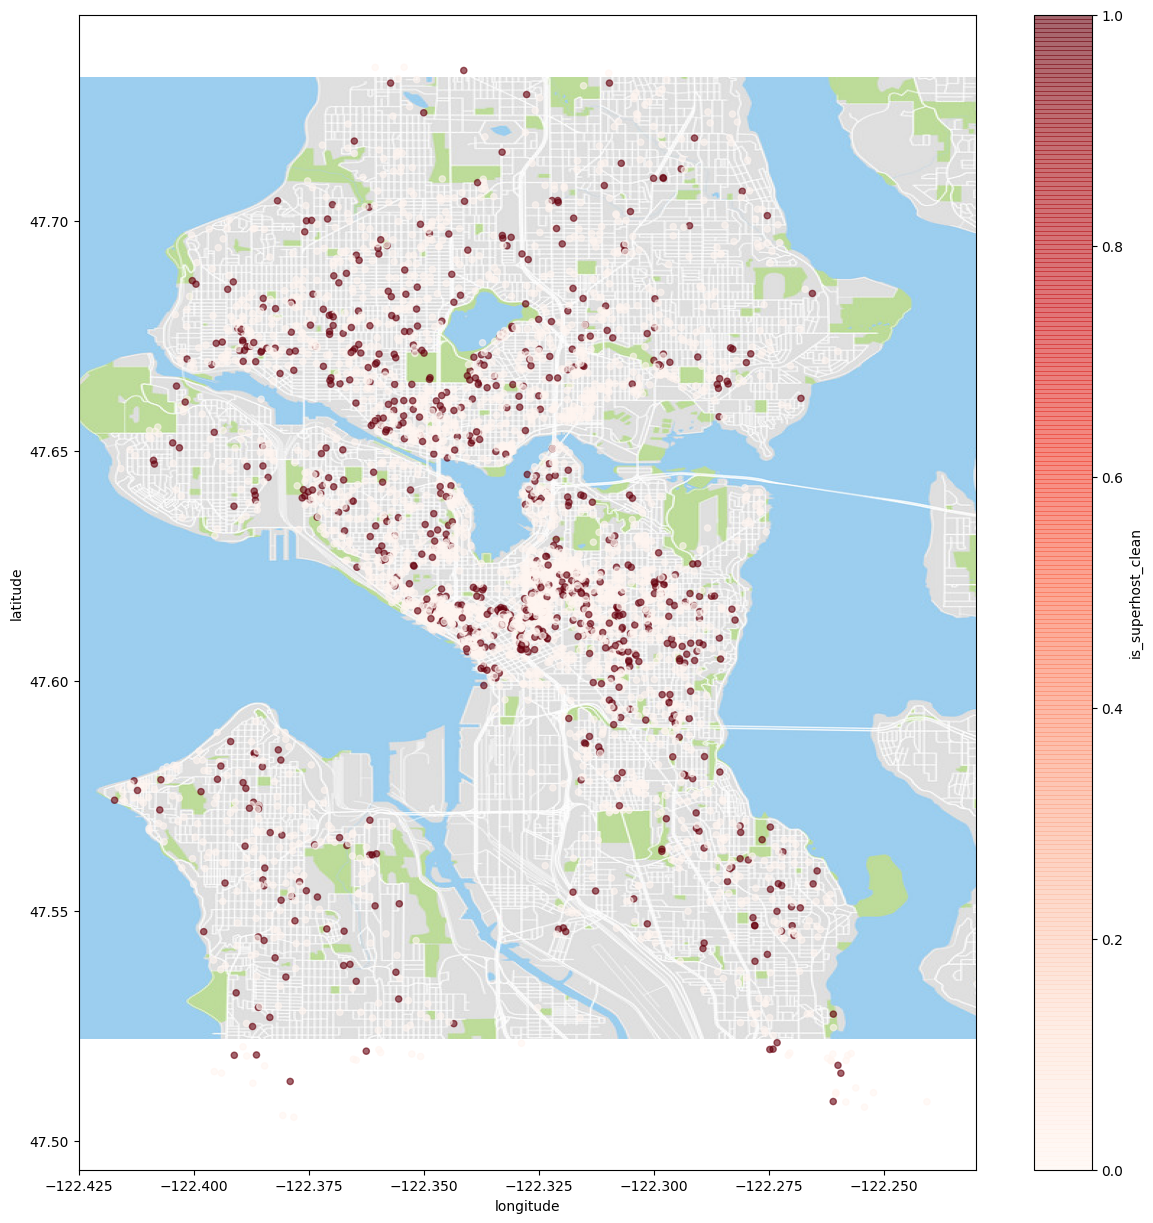

In [ ]:
plot_feature_by_location(listings_df, 'price_clean')
plot_feature_by_location(listings_df, 'rating_clean')
plot_feature_by_location(listings_df, 'number_of_reviews')
plot_feature_by_location(listings_df, 'is_superhost_clean')


### Neighbourhoods

In [ ]:
neighbourhood_df = listings_df.groupby('neighbourhood_cleansed').agg({'price_clean':['mean', 'count'], 'review_scores_rating':'mean', 'number_of_reviews':'mean', 'is_superhost_clean':'sum'})
neighbourhood_df

price_clean        ... number_of_reviews is_superhost_clean
                              mean count  ...              mean                sum
neighbourhood_cleansed                    ...                                     
Adams                   121.671429    70  ...         27.828571                 22
Alki                    171.619048    42  ...         13.119048                  5
Arbor Heights           126.800000     5  ...          9.200000                  1
Atlantic                111.396226    53  ...         22.000000                 11
Belltown                162.893162   234  ...         20.025641                 42
...                            ...   ...  ...               ...                ...
West Woodland           124.343750    64  ...         33.937500                 17
Westlake                194.470588    17  ...          4.764706                  0
Whittier Heights        128.653846    26  ...         50.307692                 10
Windermere              169.900000    10  ...          8.900000                  2
Yesler Terrace          116.235294    17  ...          9.058824                  0

[87 rows x 5 columns]

In [ ]:
# neighbourhood_df['price_clean']['mean']
neighbourhood_most_listings = neighbourhood_df['price_clean']['count'].sort_values(ascending=False)
neighbourhood_most_listings.head(10)


neighbourhood_cleansed
Broadway                     397
Belltown                     234
Wallingford                  167
Fremont                      158
Minor                        135
University District          122
Stevens                      119
First Hill                   108
Central Business District    103
Lower Queen Anne              94
Name: count, dtype: int64

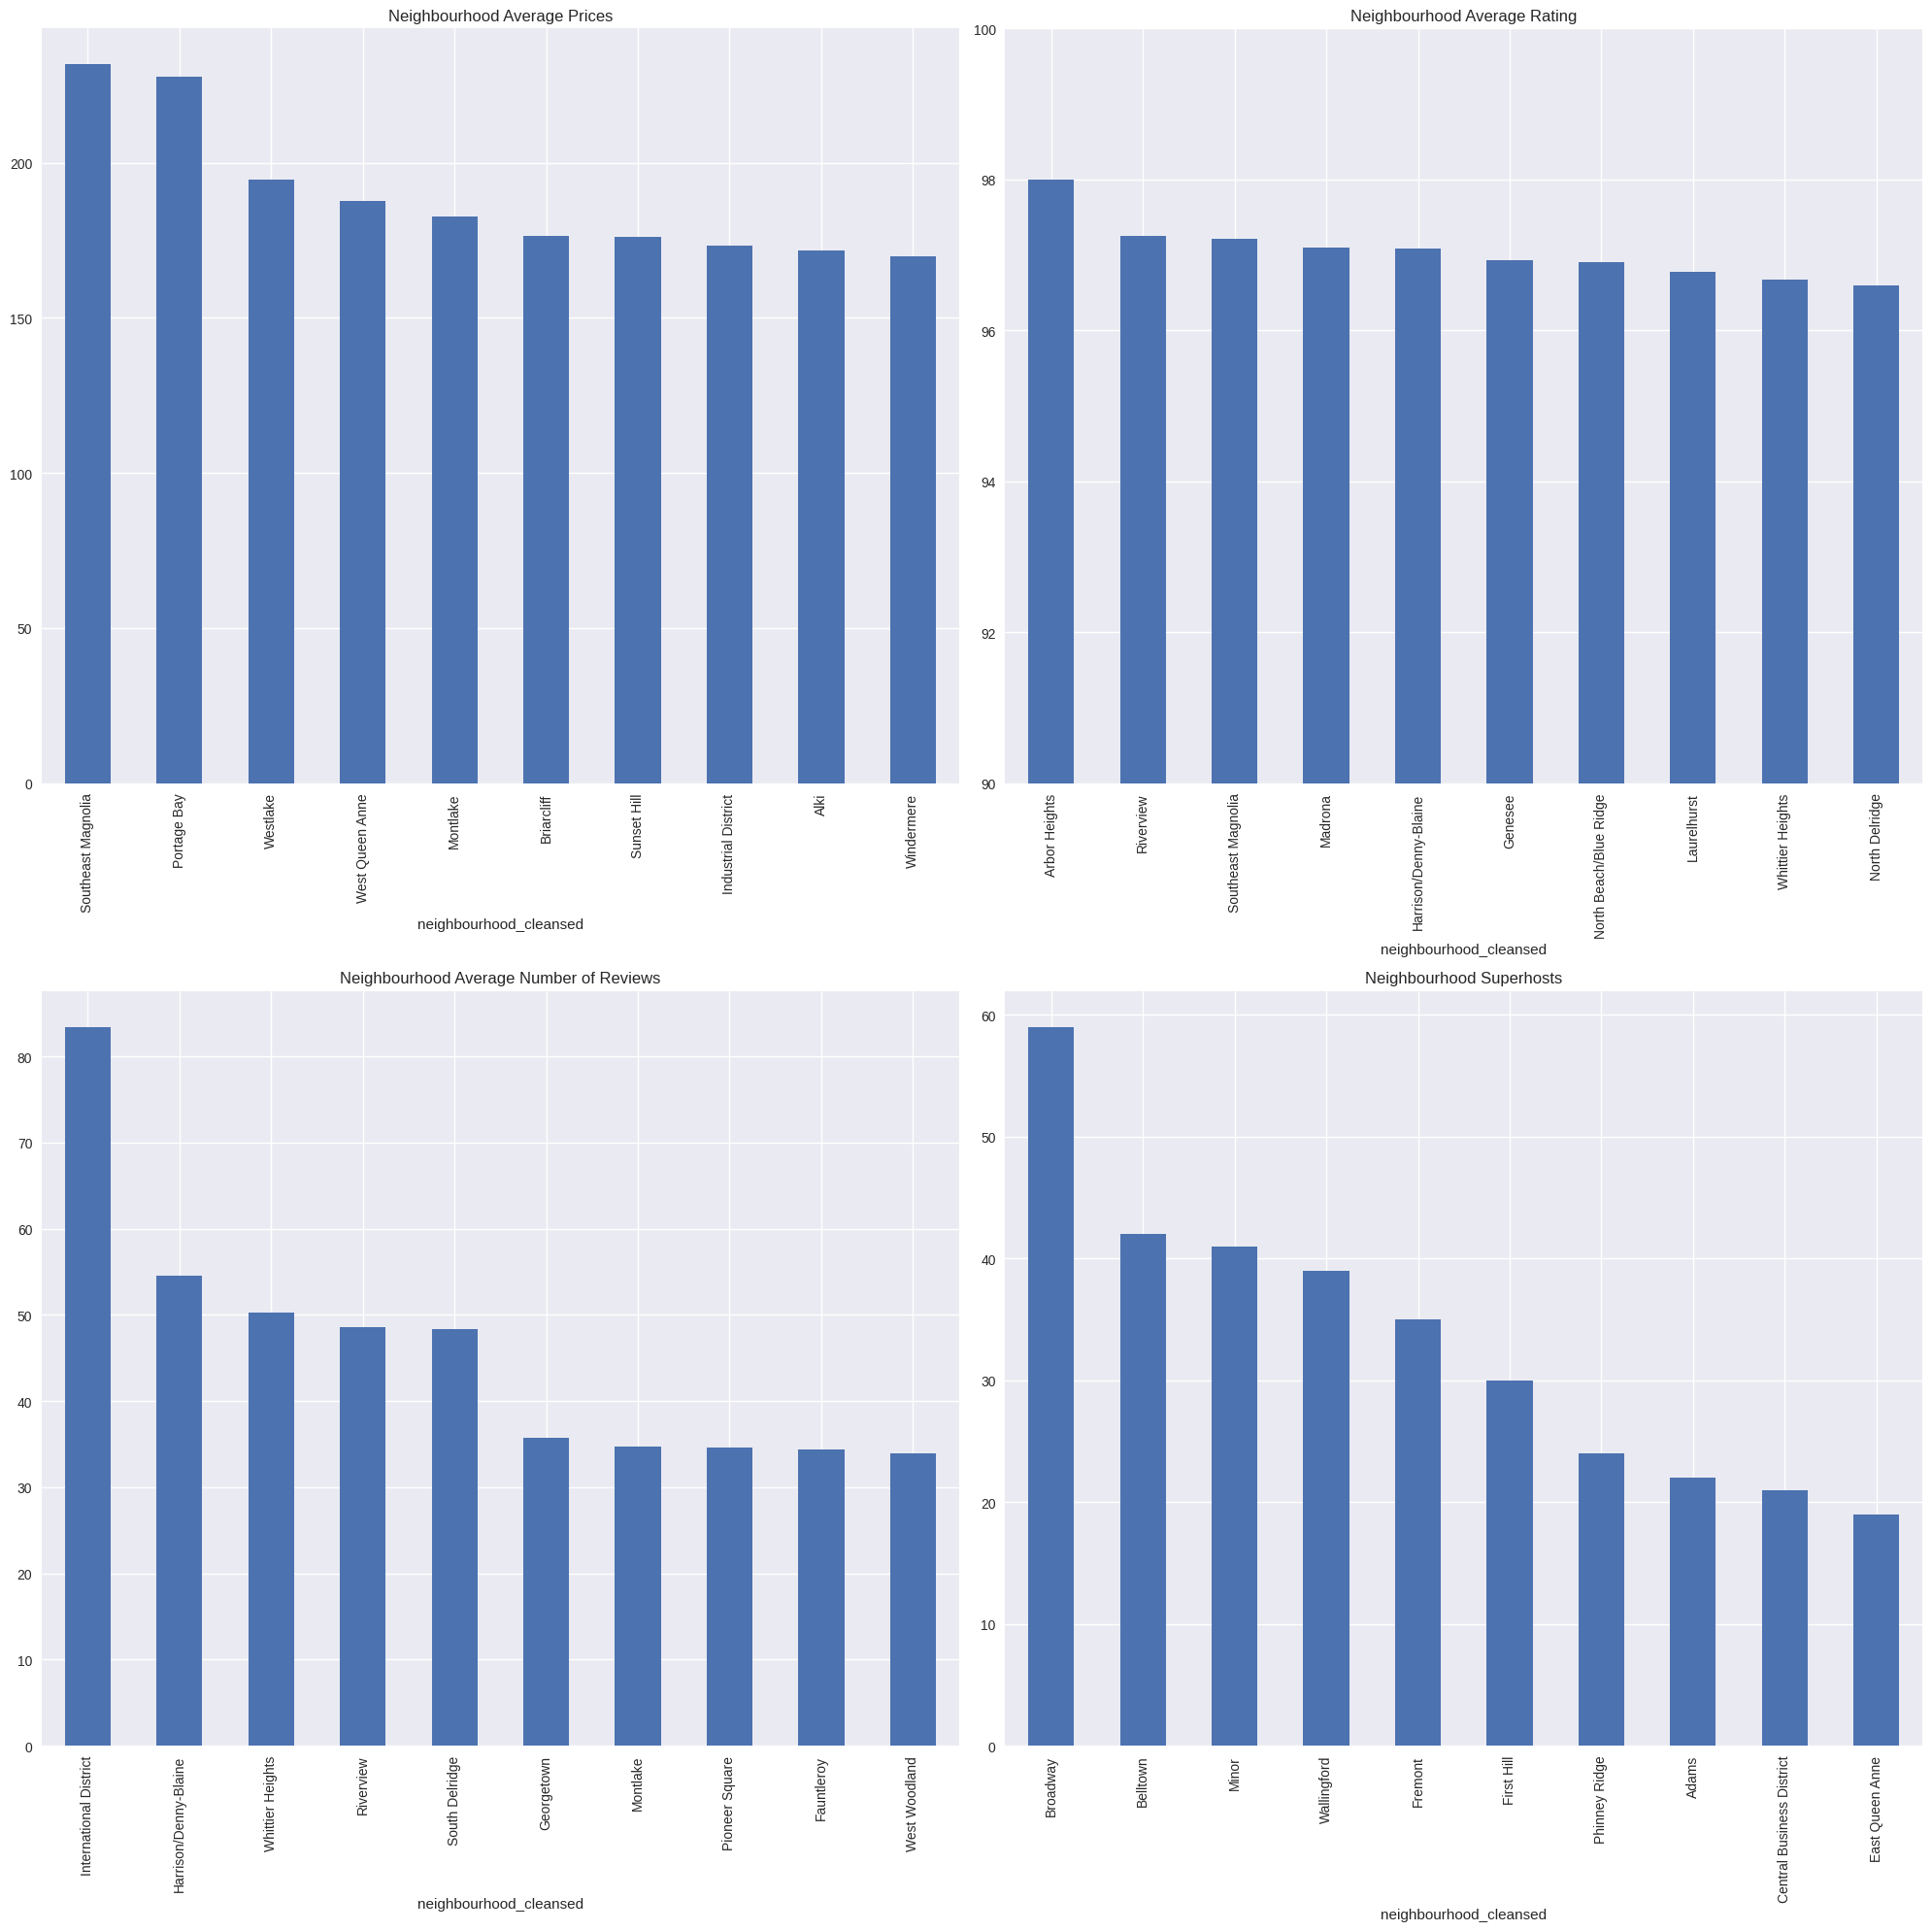

In [ ]:
# neighbourhood_df['price_clean']['mean']
plt.rcParams["figure.figsize"]=20,20
plt.style.use('dark_background')

plt.subplot(2,2,1)
neighbourhood_avg_price = neighbourhood_df['price_clean']['mean'].sort_values(ascending=False)
neighbourhood_avg_price.head(10).plot(kind='bar')
plt.title('Neighbourhood Average Prices')

plt.subplot(2,2,2)
neighbourhood_avg_rating = neighbourhood_df['review_scores_rating']['mean'].sort_values(ascending=False)
neighbourhood_avg_rating.head(10).plot(kind='bar')
plt.ylim(90,100)
plt.title('Neighbourhood Average Rating')

plt.subplot(2,2,3)
neighbourhood_avg_price = neighbourhood_df['number_of_reviews']['mean'].sort_values(ascending=False)
neighbourhood_avg_price.head(10).plot(kind='bar')
plt.title('Neighbourhood Average Number of Reviews')

plt.subplot(2,2,4)
neighbourhood_avg_price = neighbourhood_df['is_superhost_clean']['sum'].sort_values(ascending=False)
neighbourhood_avg_price.head(10).plot(kind='bar')
plt.title('Neighbourhood Superhosts')

plt.tight_layout()
plt.show()

##Host

##Price

###Property Type, Room Type and Host Type

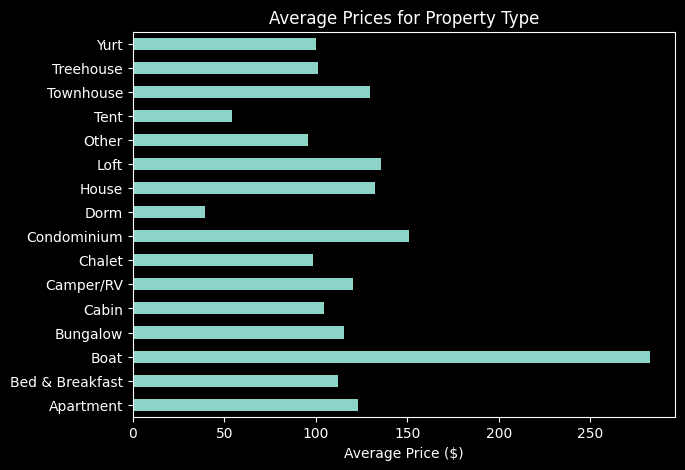

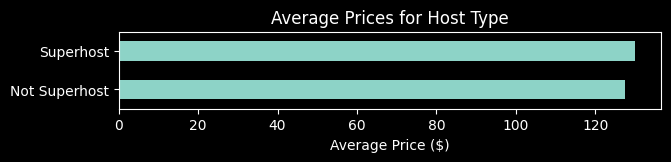

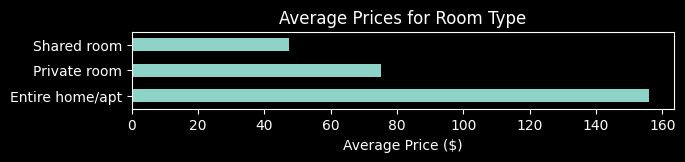

In [169]:
plt.rcParams["figure.figsize"]=7,5
plt.style.use('dark_background')
property_type_df = listings_df.groupby('property_type_clean').agg({'price_clean':['mean']})
ax = property_type_df.plot(kind='barh', legend=None, xlabel='')
ax.set_xlabel('Average Price ($)')
plt.title('Average Prices for Property Type')
plt.show()

plt.rcParams["figure.figsize"]=7,1
superhost_df = listings_df.groupby('is_superhost_clean').agg({'price_clean':['mean']})
ax = superhost_df.plot(kind='barh', legend=None, xlabel='')
ax.set_yticklabels(['Not Superhost', 'Superhost'])
ax.set_xlabel('Average Price ($)')
plt.title('Average Prices for Host Type')
plt.show()

room_type_df = listings_df.groupby('room_type').agg({'price_clean':['mean']})
ax = room_type_df.plot(kind='barh', legend=None, xlabel='')
ax.set_xlabel('Average Price ($)')
plt.title('Average Prices for Room Type')
plt.show()


###Accomodation

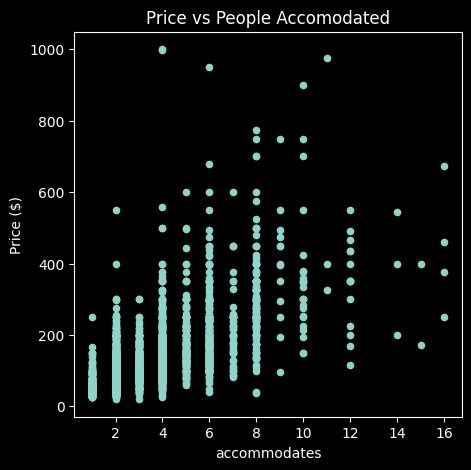

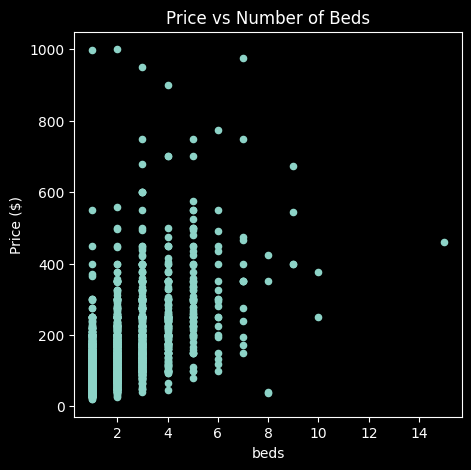

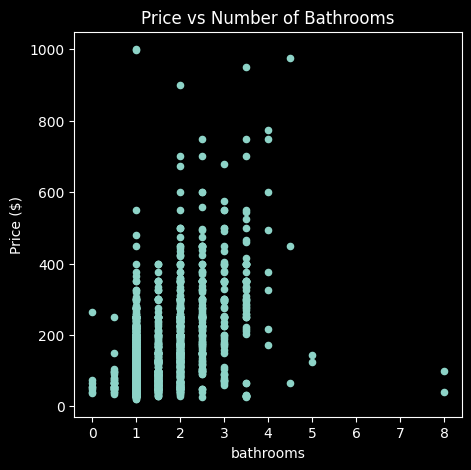

In [170]:
plt.rcParams["figure.figsize"]=5,5
ax = listings_df.plot(x='accommodates', y='price_clean', kind='scatter')
ax.set_ylabel('Price ($)')
plt.title('Price vs People Accomodated')
plt.show()

ax = listings_df.plot(x='beds', y='price_clean', kind='scatter')
ax.set_ylabel('Price ($)')
plt.title('Price vs Number of Beds')
plt.show()

ax = listings_df.plot(x='bathrooms', y='price_clean', kind='scatter')
ax.set_ylabel('Price ($)')
plt.title('Price vs Number of Bathrooms')
plt.show()

###Reviews

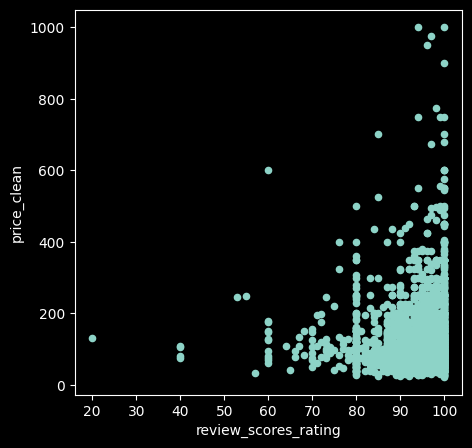

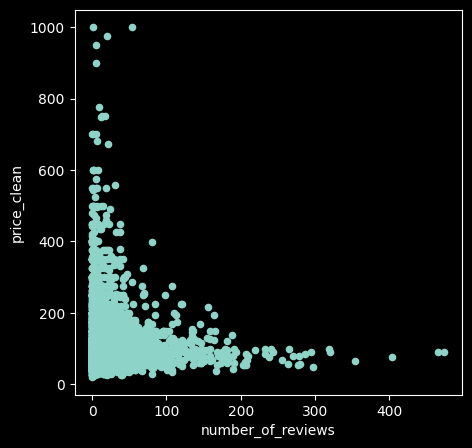

In [171]:
plt.rcParams["figure.figsize"]=5,5
#using original columns as Pandas automatically ignores points with NaN values
listings_df.plot(x='review_scores_rating', y='price_clean', kind='scatter')
listings_df.plot(x='number_of_reviews', y='price_clean', kind='scatter')

###Amenities

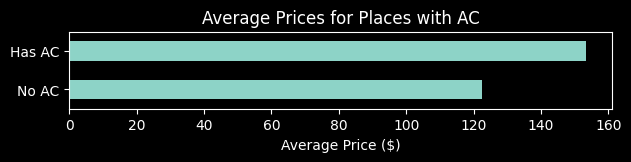

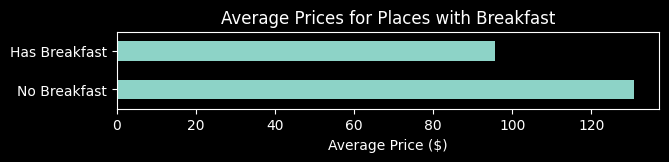

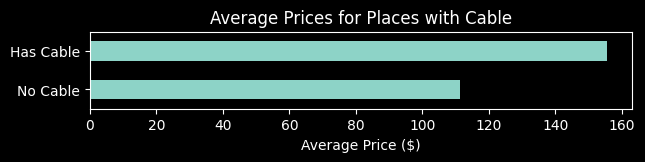

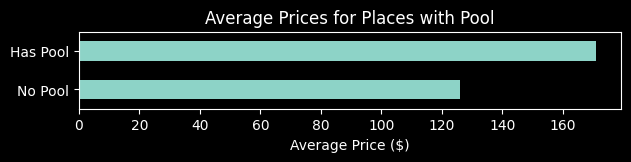

In [176]:
plt.rcParams["figure.figsize"]=7,1
has_AC_df = listings_df.groupby('has_AC').agg({'price_clean':['mean']})
ax = has_AC_df.plot(kind='barh', legend=None, xlabel='')
ax.set_yticklabels(['No AC', 'Has AC'])
ax.set_xlabel('Average Price ($)')
plt.title('Average Prices for Places with AC')
plt.show()

has_AC_df = listings_df.groupby('has_breakfast').agg({'price_clean':['mean']})
ax = has_AC_df.plot(kind='barh', legend=None, xlabel='')
ax.set_yticklabels(['No Breakfast', 'Has Breakfast'])
ax.set_xlabel('Average Price ($)')
plt.title('Average Prices for Places with Breakfast')
plt.show()

has_AC_df = listings_df.groupby('has_cable').agg({'price_clean':['mean']})
ax = has_AC_df.plot(kind='barh', legend=None, xlabel='')
ax.set_yticklabels(['No Cable', 'Has Cable'])
ax.set_xlabel('Average Price ($)')
plt.title('Average Prices for Places with Cable')
plt.show()

has_AC_df = listings_df.groupby('has_pool').agg({'price_clean':['mean']})
ax = has_AC_df.plot(kind='barh', legend=None, xlabel='')
ax.set_yticklabels(['No Pool', 'Has Pool'])
ax.set_xlabel('Average Price ($)')
plt.title('Average Prices for Places with Pool')
plt.show()



#Predictive Models